<a href="https://colab.research.google.com/github/bhas10bc/Deep_learning/blob/main/multi_class_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the data

In [80]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-10-02 16:17:43--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.203.207, 74.125.199.207, 108.177.98.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.203.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M   103MB/s    in 6.3s    

2023-10-02 16:17:49 (79.0 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [81]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

In [82]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [83]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (382, 512, 3)


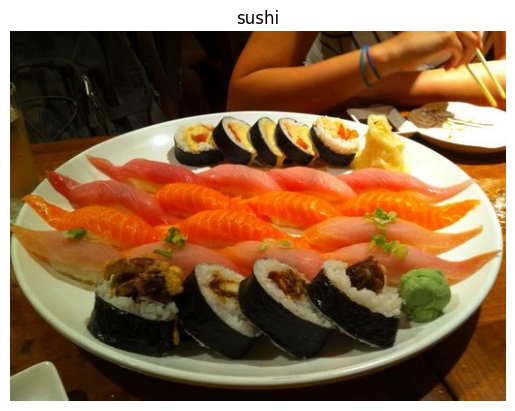

In [84]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [86]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [87]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 119ms/step - loss: 2.1139 - accuracy: 0.2277 - val_loss: 1.9686 - val_accuracy: 0.3032
Epoch 2/5
235/235 [==============================] - 28s 119ms/step - loss: 1.8246 - accuracy: 0.3756 - val_loss: 1.8869 - val_accuracy: 0.3364
Epoch 3/5
235/235 [==============================] - 28s 119ms/step - loss: 1.4722 - accuracy: 0.5024 - val_loss: 2.0473 - val_accuracy: 0.3116
Epoch 4/5
235/235 [==============================] - 28s 119ms/step - loss: 0.8970 - accuracy: 0.7043 - val_loss: 2.4724 - val_accuracy: 0.3000
Epoch 5/5
235/235 [==============================] - 28s 119ms/step - loss: 0.3726 - accuracy: 0.8808 - val_loss: 3.5830 - val_accuracy: 0.2628


In [88]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 7s 86ms/step - loss: 3.5830 - accuracy: 0.2628


[3.583026170730591, 0.262800008058548]

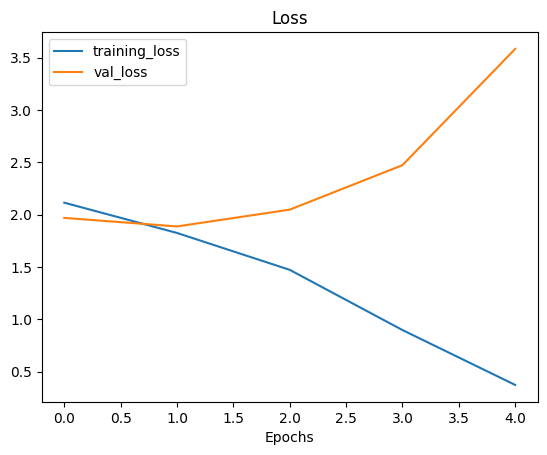

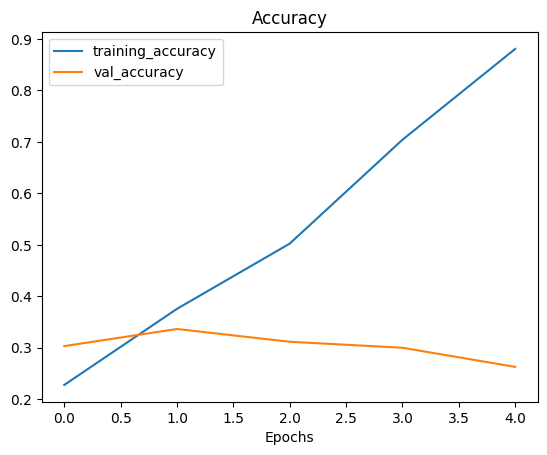

In [89]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

In [90]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 29s 119ms/step - loss: 2.2797 - accuracy: 0.1733 - val_loss: 2.0859 - val_accuracy: 0.2524
Epoch 2/5
235/235 [==============================] - 27s 113ms/step - loss: 1.9259 - accuracy: 0.3343 - val_loss: 2.1219 - val_accuracy: 0.2432
Epoch 3/5
235/235 [==============================] - 28s 119ms/step - loss: 1.5222 - accuracy: 0.4931 - val_loss: 2.0830 - val_accuracy: 0.2948
Epoch 4/5
235/235 [==============================] - 26s 112ms/step - loss: 1.0167 - accuracy: 0.6787 - val_loss: 2.4732 - val_accuracy: 0.2804
Epoch 5/5
235/235 [==============================] - 26s 112ms/step - loss: 0.5706 - accuracy: 0.8323 - val_loss: 2.8944 - val_accuracy: 0.2468


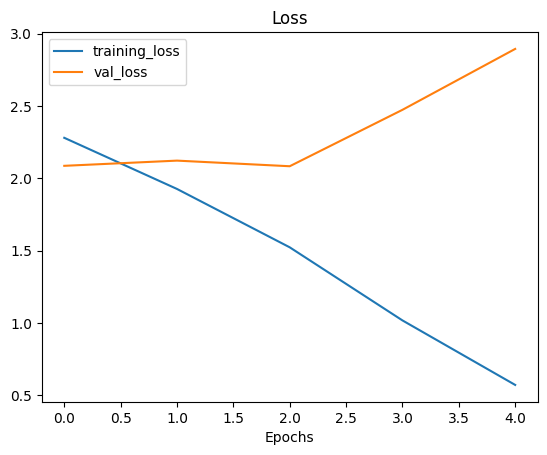

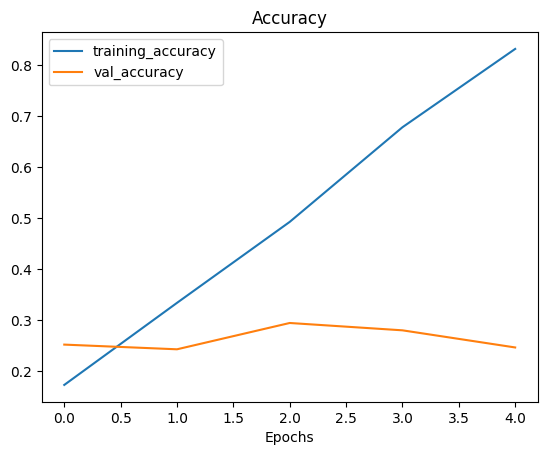

In [91]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

In [92]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [93]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 105s 441ms/step - loss: 2.1651 - accuracy: 0.2167 - val_loss: 1.9198 - val_accuracy: 0.3212
Epoch 2/5
235/235 [==============================] - 101s 431ms/step - loss: 2.0272 - accuracy: 0.2832 - val_loss: 1.8991 - val_accuracy: 0.3384
Epoch 3/5
235/235 [==============================] - 102s 433ms/step - loss: 1.9645 - accuracy: 0.3072 - val_loss: 1.8311 - val_accuracy: 0.3508
Epoch 4/5
235/235 [==============================] - 102s 433ms/step - loss: 1.9371 - accuracy: 0.3260 - val_loss: 1.7982 - val_accuracy: 0.3860
Epoch 5/5
235/235 [==============================] - 106s 449ms/step - loss: 1.9148 - accuracy: 0.3368 - val_loss: 1.7433 - val_accuracy: 0.3936


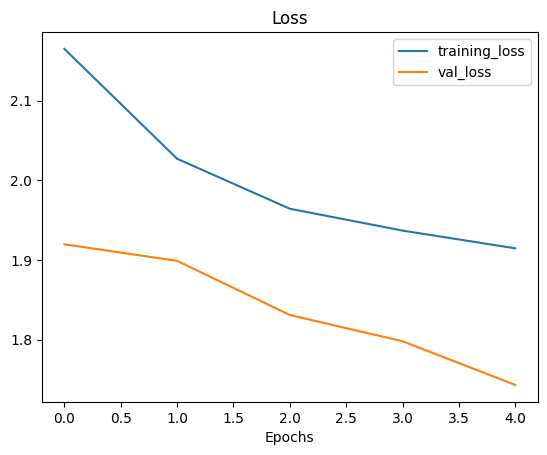

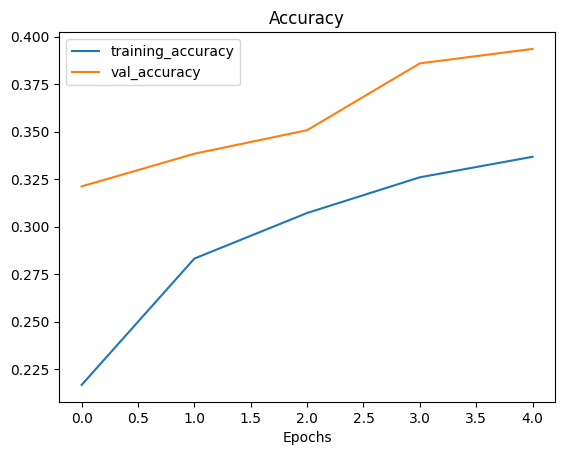

In [94]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

In [95]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [96]:

# -q is for "quiet"
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 65ms/step


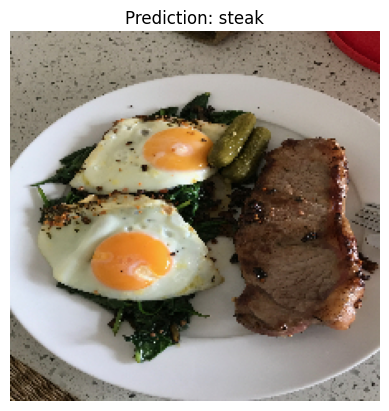

In [97]:
# Make a prediction using model_11
pred_and_plot(model=model_11,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 37ms/step


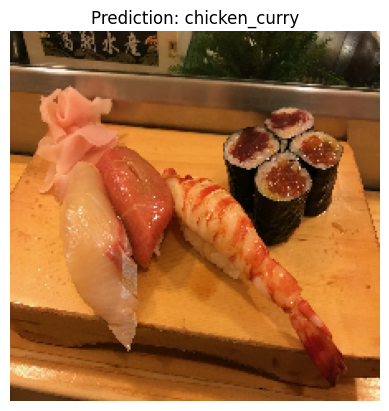

In [98]:
pred_and_plot(model_11, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 20ms/step


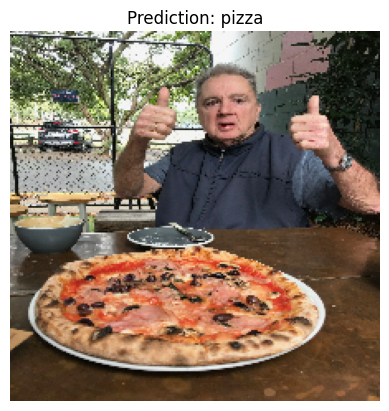

In [99]:
pred_and_plot(model_11, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 19ms/step


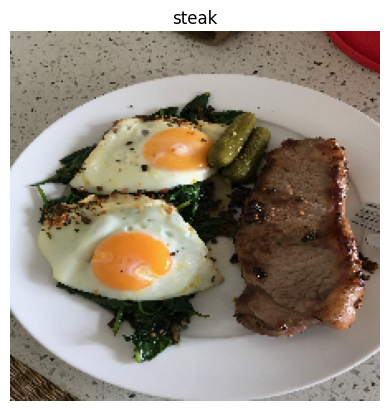

In [100]:
# Load in and preprocess our custom image
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [101]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

1/1 [==============================] - 0s 28ms/step


array([[0.03896732, 0.04864004, 0.05446658, 0.164227  , 0.13502145,
        0.11446708, 0.02394993, 0.07400767, 0.23059148, 0.11566143]],
      dtype=float32)

In [102]:
# Find the predicted class name
class_names[pred.argmax()]

'steak'

In [103]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 23ms/step


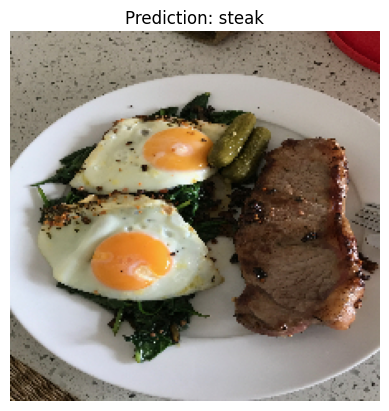

In [104]:
pred_and_plot(model_11, "03-steak.jpeg", class_names)

In [105]:
# Save a model
model_11.save("saved_trained_model")

In [106]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 1.7433 - accuracy: 0.3936


[1.743340253829956, 0.3935999870300293]

In [107]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 6s 80ms/step - loss: 1.7433 - accuracy: 0.3936


[1.7433406114578247, 0.3935999870300293]